# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from datetime import datetime
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


In [48]:
#Set units for search
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:

        
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | kismayo
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | tsiombe
Processing Record 5 of Set 1 | grand falls-windsor
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | eydhafushi
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | nova vicosa
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | dhidhdhoo
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | gornozavodsk
Processing Record 21 of Set 1 | udachny
Proce

Processing Record 41 of Set 4 | badger
Processing Record 42 of Set 4 | pyapon
Processing Record 43 of Set 4 | yamba
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | jiwani
Processing Record 46 of Set 4 | port erin
Processing Record 47 of Set 4 | susuman
Processing Record 48 of Set 4 | ouesso
Processing Record 49 of Set 4 | zhosaly
Processing Record 0 of Set 5 | senillosa
Processing Record 1 of Set 5 | al fuwayliq
Processing Record 2 of Set 5 | santa elena de uairen
Processing Record 3 of Set 5 | kolonia
Processing Record 4 of Set 5 | ojinaga
Processing Record 5 of Set 5 | yeppoon
Processing Record 6 of Set 5 | el jadid
Processing Record 7 of Set 5 | puqi
Processing Record 8 of Set 5 | uturoa
Processing Record 9 of Set 5 | mount isa
Processing Record 10 of Set 5 | ploneour-lanvern
Processing Record 11 of Set 5 | kievka
Processing Record 12 of Set 5 | arkalyk
Processing Record 13 of Set 5 | emiliano zapata
Processing Record 14 of Set 5 | orshanka
Processing Record

Processing Record 35 of Set 8 | flying fish cove
Processing Record 36 of Set 8 | al jaradiyah
Processing Record 37 of Set 8 | igrim
Processing Record 38 of Set 8 | mitu
Processing Record 39 of Set 8 | anibare
City not found. Skipping...
Processing Record 40 of Set 8 | new norfolk
Processing Record 41 of Set 8 | kalibo (poblacion)
Processing Record 42 of Set 8 | olenegorsk
Processing Record 43 of Set 8 | erenhot
Processing Record 44 of Set 8 | darovskoy
Processing Record 45 of Set 8 | sao caetano de odivelas
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | kaa-khem
Processing Record 48 of Set 8 | hola
Processing Record 49 of Set 8 | alindao
Processing Record 0 of Set 9 | burutu
Processing Record 1 of Set 9 | utrik
Processing Record 2 of Set 9 | rabo de peixe
Processing Record 3 of Set 9 | riachao
Processing Record 4 of Set 9 | geyve
Processing Record 5 of Set 9 | puerto francisco de orellana
Processing Record 6 of Set 9 | kaedi
Processing Record 7 of Set 9 | pl

Processing Record 24 of Set 12 | aegina
Processing Record 25 of Set 12 | sierra grande
Processing Record 26 of Set 12 | kataba
Processing Record 27 of Set 12 | avra valley
Processing Record 28 of Set 12 | mount pearl
Processing Record 29 of Set 12 | mayahi
Processing Record 30 of Set 12 | guerrero negro
Processing Record 31 of Set 12 | tangalle
Processing Record 32 of Set 12 | ongjin
Processing Record 33 of Set 12 | quellon
Processing Record 34 of Set 12 | salaga
Processing Record 35 of Set 12 | antsiranana
Processing Record 36 of Set 12 | datong
Processing Record 37 of Set 12 | vinton
Processing Record 38 of Set 12 | lepsy
Processing Record 39 of Set 12 | zaozersk
Processing Record 40 of Set 12 | tevriz
Processing Record 41 of Set 12 | saratamata
City not found. Skipping...
Processing Record 42 of Set 12 | puerto madryn
Processing Record 43 of Set 12 | sheksna
Processing Record 44 of Set 12 | sorsk
Processing Record 45 of Set 12 | chittagong
Processing Record 46 of Set 12 | arvayheer


In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-4.15,79,100,5.66,CA,1698325913
1,kismayo,-0.3582,42.5454,28.60,71,40,5.52,SO,1698325913
2,lata,40.1629,-8.3327,17.26,93,100,1.64,PT,1698325913
3,tsiombe,-25.3000,45.4833,25.82,42,17,6.15,MG,1698325913
4,grand falls-windsor,48.9332,-55.6649,9.72,95,99,3.66,CA,1698325913


In [54]:
# Export the City_Data into a csv


os.makedirs('output_data', exist_ok=True)  
city_data_df.to_csv('output_data/cities.csv',index_label="City_ID")


 



In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-4.15,79,100,5.66,CA,1698325913
1,kismayo,-0.3582,42.5454,28.60,71,40,5.52,SO,1698325913
2,lata,40.1629,-8.3327,17.26,93,100,1.64,PT,1698325913
3,tsiombe,-25.3000,45.4833,25.82,42,17,6.15,MG,1698325913
4,grand falls-windsor,48.9332,-55.6649,9.72,95,99,3.66,CA,1698325913


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

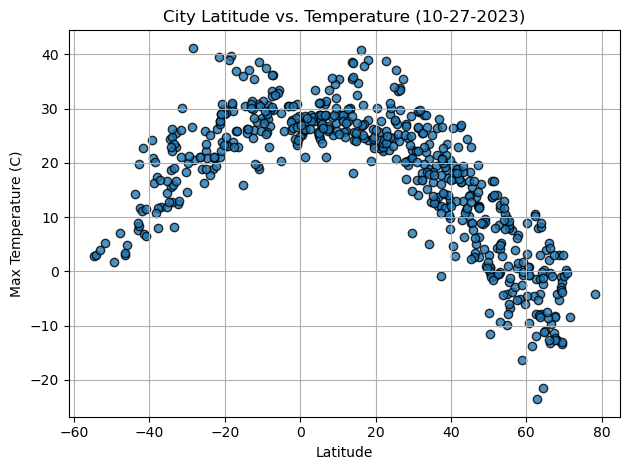

<Figure size 640x480 with 0 Axes>

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

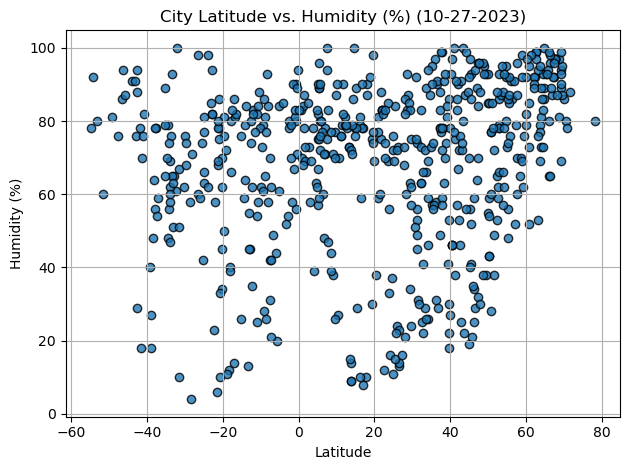

<Figure size 640x480 with 0 Axes>

In [57]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

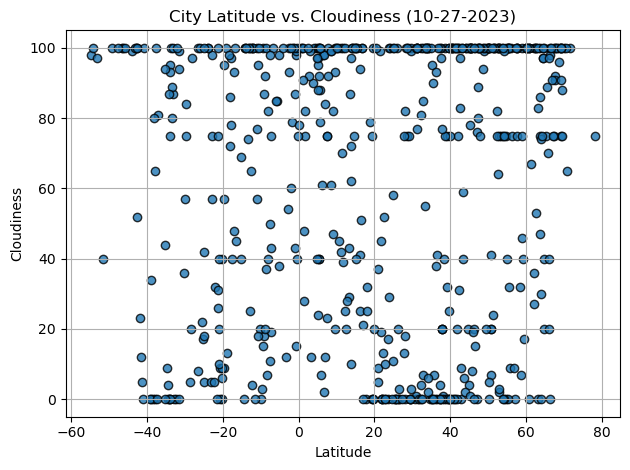

<Figure size 640x480 with 0 Axes>

In [58]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

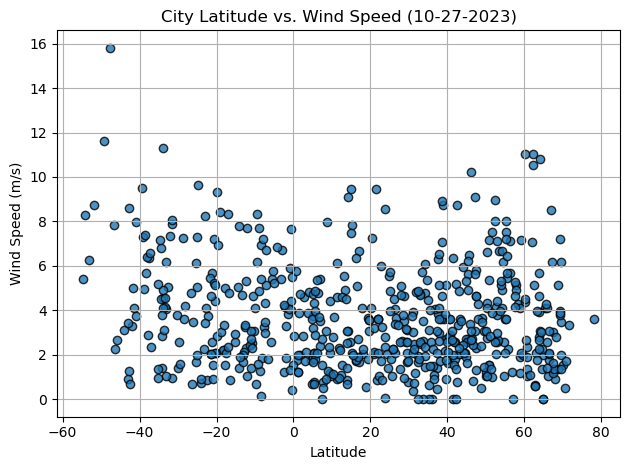

In [59]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-4.15,79,100,5.66,CA,1698325913
2,lata,40.1629,-8.3327,17.26,93,100,1.64,PT,1698325913
4,grand falls-windsor,48.9332,-55.6649,9.72,95,99,3.66,CA,1698325913
5,bethel,41.3712,-73.4140,17.86,75,0,0.00,US,1698325914
6,lihue,21.9789,-159.3672,22.58,83,0,3.60,US,1698325914


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kismayo,-0.3582,42.5454,28.60,71,40,5.52,SO,1698325913
3,tsiombe,-25.3000,45.4833,25.82,42,17,6.15,MG,1698325913
7,west island,-12.1568,96.8225,25.99,83,100,7.72,CC,1698325914
9,port-aux-francais,-49.3500,70.2167,1.73,81,100,11.63,TF,1698325915
10,papatowai,-46.5619,169.4708,3.03,86,100,7.82,NZ,1698325915


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8635615634784806


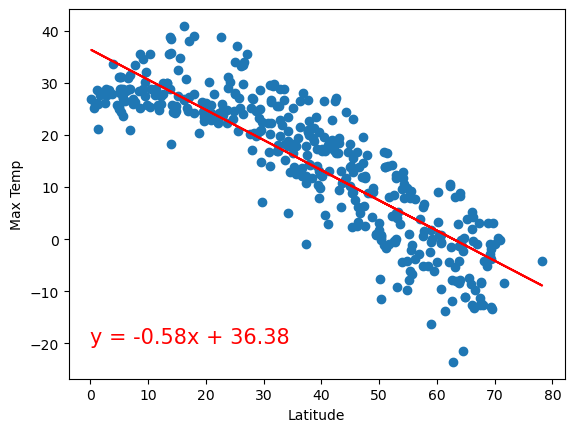

In [62]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.7515219400686692


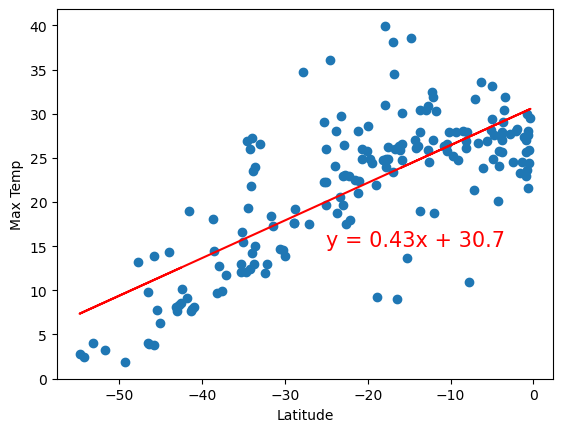

In [38]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** 
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2324387547602555


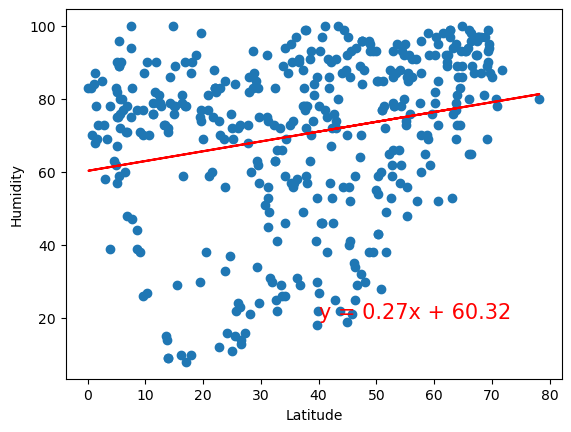

In [63]:

# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is -0.05832742210987485


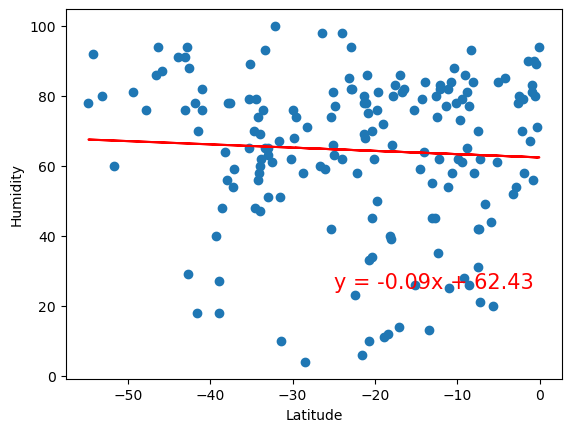

In [64]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:

The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.09990598888840244


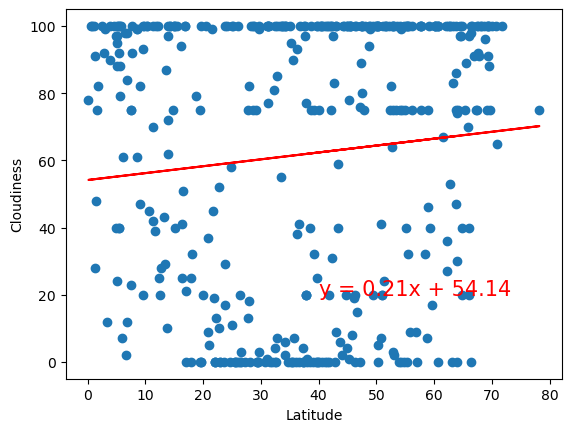

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.12517916246314587


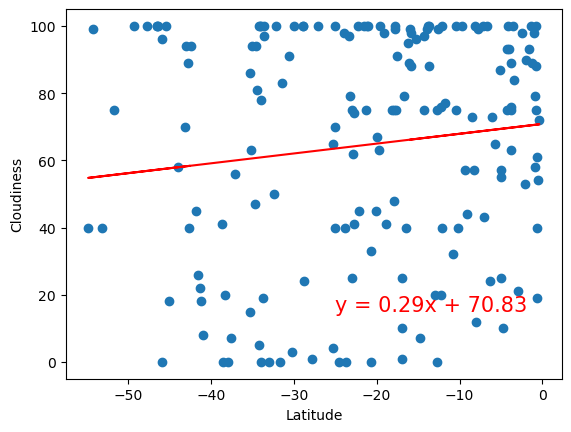

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:

There does not appear to be a coorelation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.10483501565183716


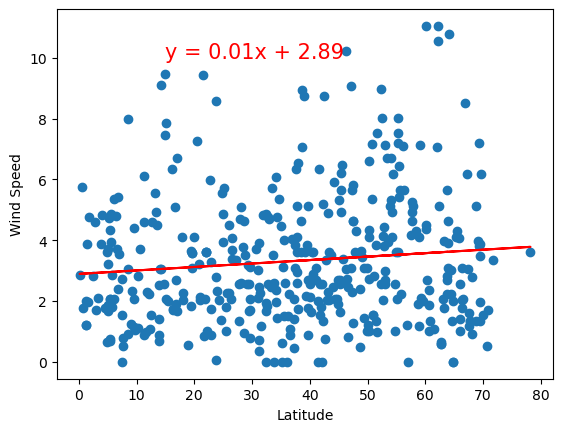

In [69]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.23084729884791175


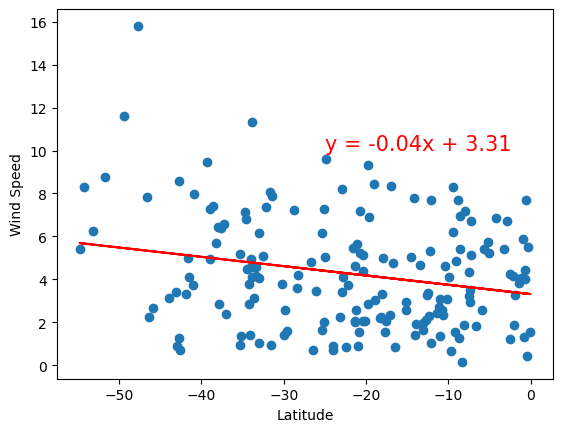

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:

There does not appear to be a coorelation between latitude and wind speed.